In [5]:
import numpy as np
import cv2
from sklearn import datasets
import sklearn.datasets
import matplotlib.pyplot as plt
%matplotlib inline

In [221]:
def detekcija_ivice_platoa(img):
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY);

    rame_thresh = cv2.adaptiveThreshold(gray_img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 35, 10)
    ret, frame_thresh = cv2.threshold(gray_img, 108, 255, cv2.THRESH_BINARY)
    
#     plt.figure()
#     plt.imshow(frame_thresh, 'gray')
    
    dialated_iter1 = dilate(frame_thresh)
    dialated_iter2 = dilate(dialated_iter1)
    eroded_iter1 = erode(dialated_iter2)
    
#     plt.imshow(eroded_iter1, 'gray')
#     plt.show()

    edges_img = cv2.Canny(eroded_iter1, 50, 100, apertureSize=3)
    # minimalna duzina linije
    min_line_length = 300
    # Hough transformacija
    lines = cv2.HoughLinesP(image=edges_img, rho=1, theta=np.pi/180, threshold=50, lines=np.array([]),
                            minLineLength=min_line_length, maxLineGap=17)
    # Detektovane linije [[x1 y1 x2 y2]]:
    for i in range(len(lines)):
        cv2.line(edges_img, (lines[i][0][0], lines[i][0][1]), (lines[i][0][2], lines[i][0][3]), (255,0,0), 5);

    plt.figure()
    plt.imshow(edges_img, 'gray')
    plt.show()
    
    x1 = lines[0][0][0] 
    y1 = 480 - lines[0][0][1]
    x2 = lines[0][0][2]
    y2 = 480 - lines[0][0][3]
    return (x1, y1, x2, y2)

In [222]:
def dilate(image):
    kernel = np.ones((3, 3)) # strukturni element 3x3 blok
    return cv2.dilate(image, kernel, iterations=1)

def erode(image):
    kernel = np.ones((3, 3)) # strukturni element 3x3 blok
    return cv2.erode(image, kernel, iterations=1)

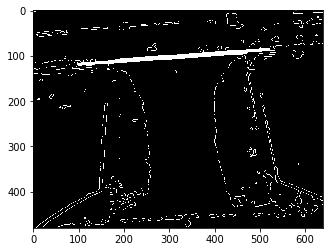

(184, 370, 519, 394)


In [223]:
#SAMO UZIMA PRVI FREJM
vid_name = "data/videos/video1.mp4"
capture = cv2.VideoCapture(vid_name)
capture.set(1, 0) # indeksiranje frejmova
ret_val, frame = capture.read()

print(detekcija_ivice_platoa(frame))